Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

### Problem type - Regression

In [5]:
# Let's start with importing neccessary libraries

import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('baseball.csv')

In [7]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
data.shape

(30, 17)

In [9]:
# Understand data at high level. Check the statistics of data set
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null and missing values

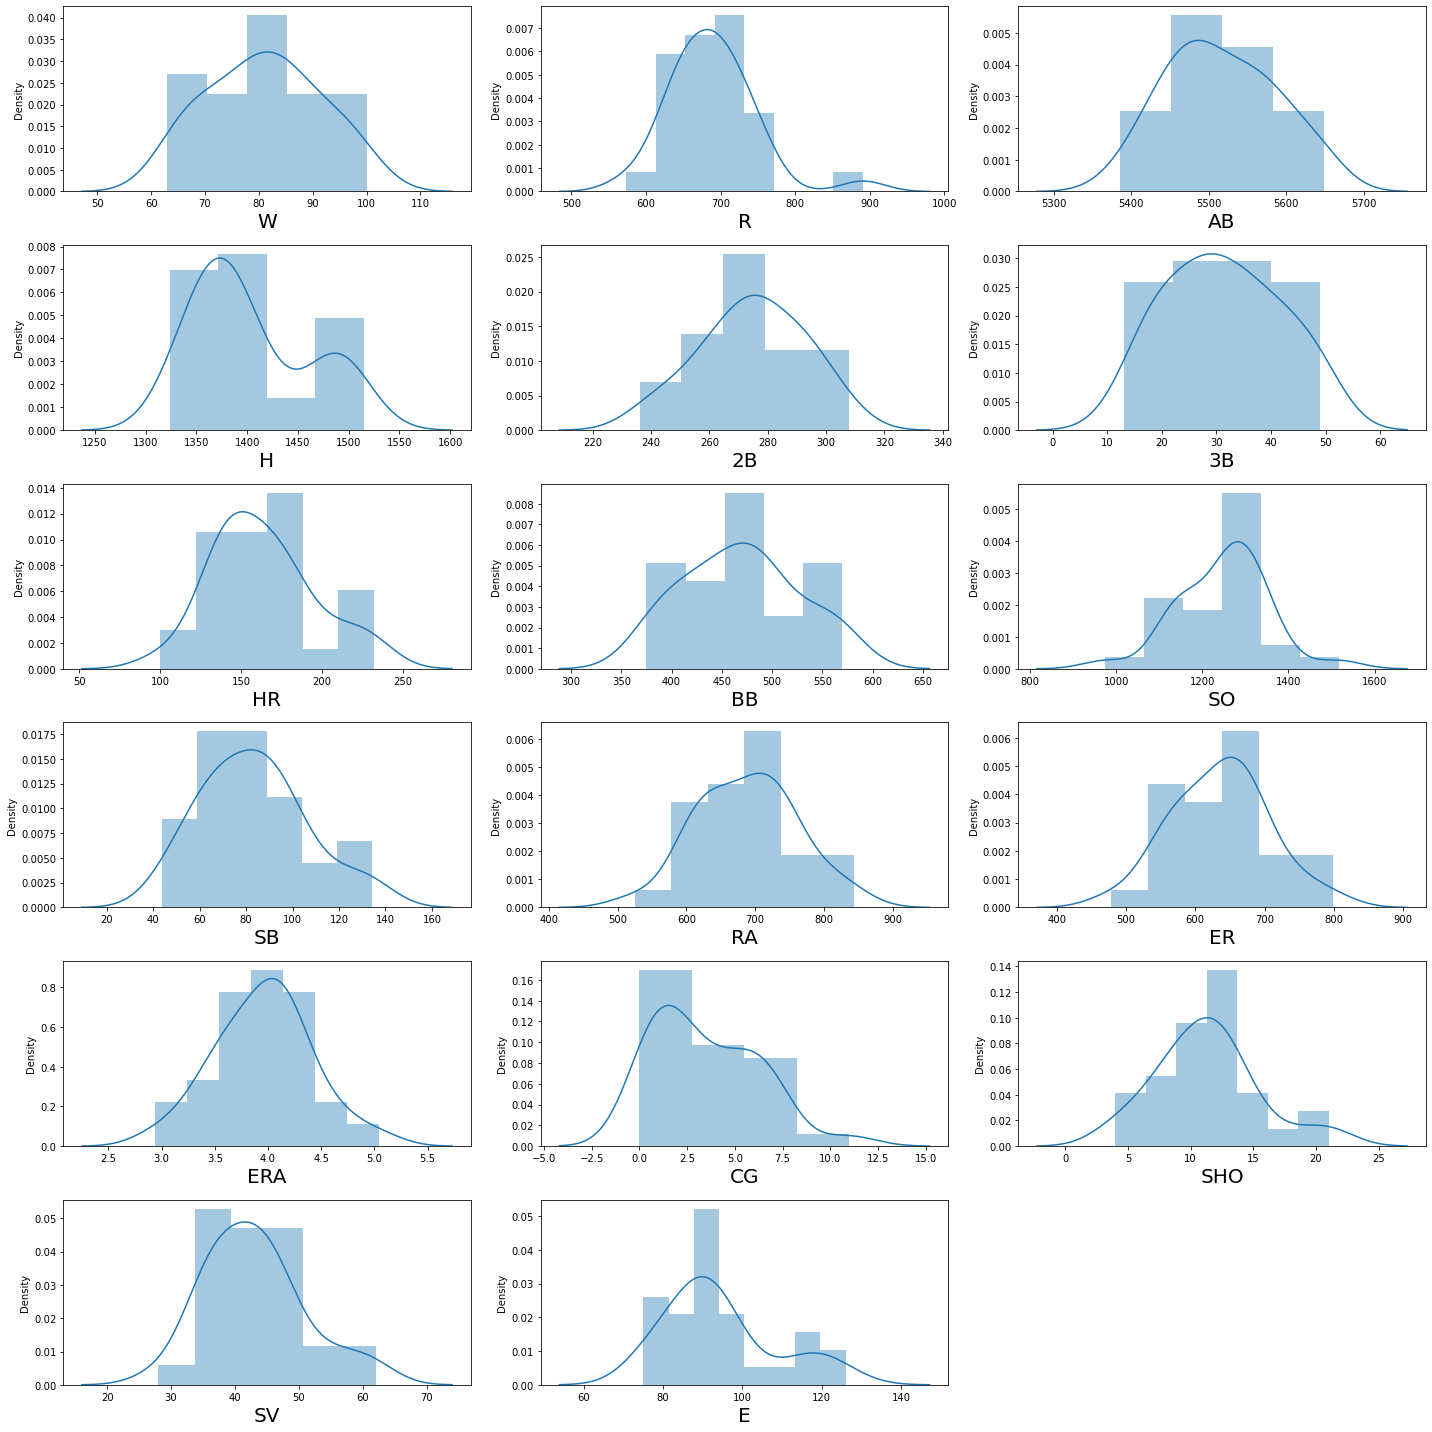

In [18]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,20), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

In [19]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Data distribution looks balanced

Let's observe the relationship between independent variables and dependent variable.

In [20]:
# Divide data set into features and label
y = data['W']
x = data.drop(columns = ['W'])

In [21]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [22]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

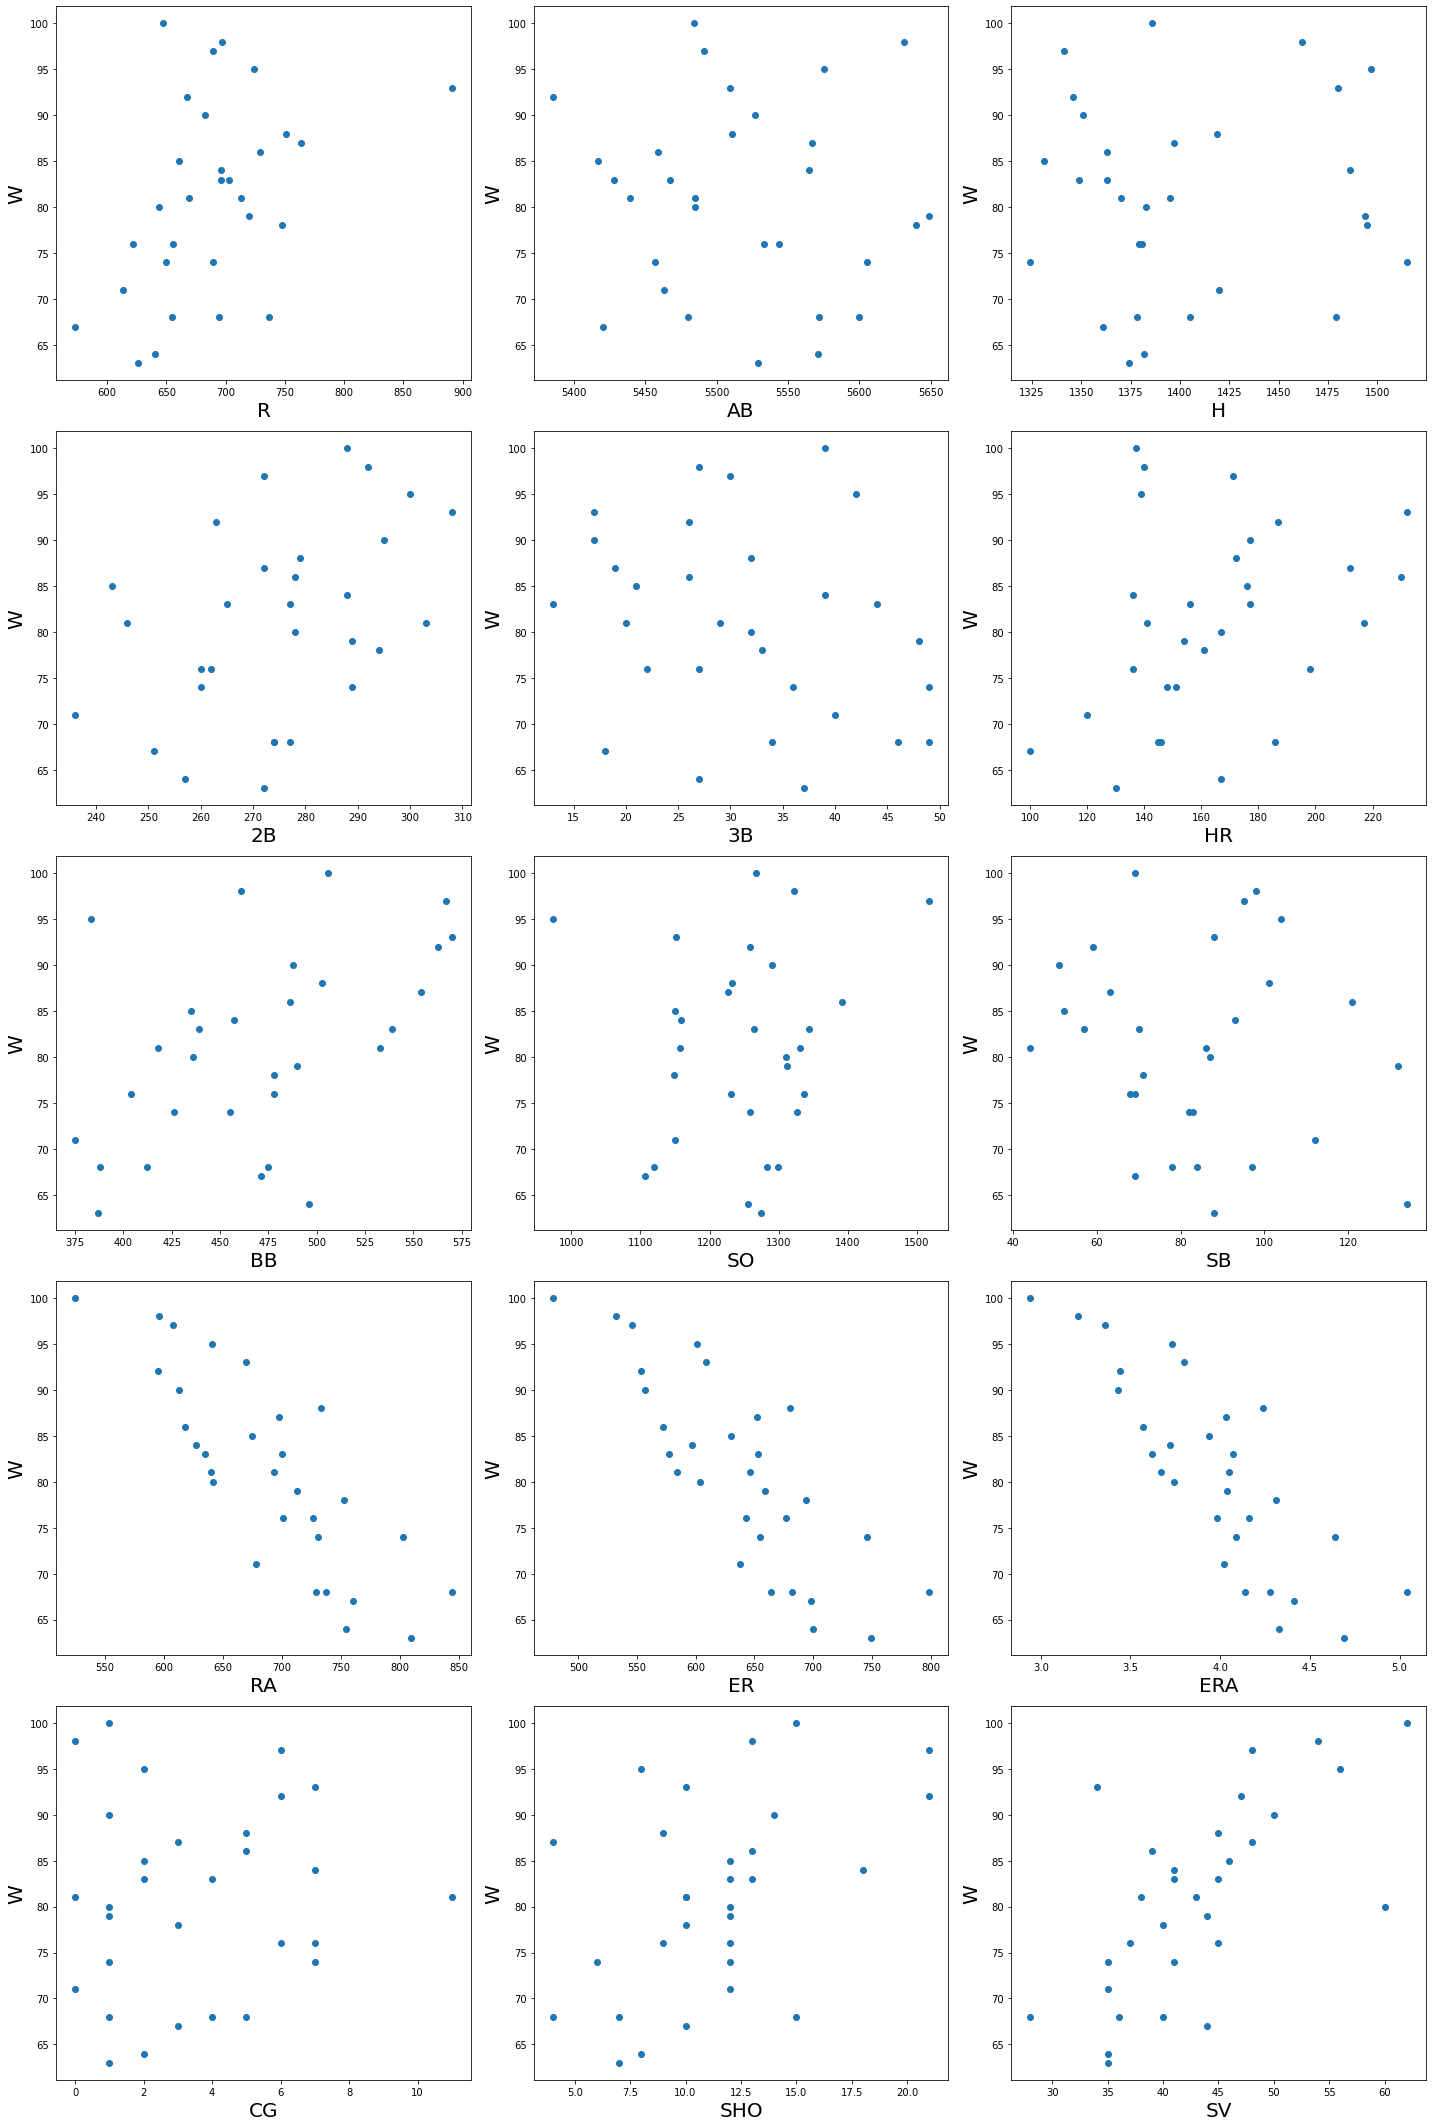

In [23]:
# Visualizing relationship
plt.figure(figsize=(20,35), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber+=1
plt.tight_layout()

Looks difficult to establish any relationship

In [24]:
# Data scaling. Formula Z = (X- mean)/std

scaler = StandardScaler()
x_scl = scaler.fit_transform(x)

In [25]:
# Our final features dataset
x_scl

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

Let's go ahead and use llinear regression and see how good it fits our data. But first, let's split our data in train and test.

In [36]:
# Split data into train and test. Model will be built on training data and tested on test data.
x_train, x_test,y_train,y_test = train_test_split(x_scl, y, test_size = 0.25, random_state=323)


In [37]:
x_train

array([[ 0.54984278,  1.91581492,  1.61028582,  0.80189192,  1.6250396 ,
        -0.30788808,  0.37258375,  0.62539523,  2.16211413,  0.3493379 ,
         0.33593445,  0.1874017 , -0.90785587,  0.1728    ,  0.1206314 ,
        -0.60719689],
       [ 0.84409233,  0.80443057,  1.34328927, -0.04121874,  1.72234737,
         0.71485434, -1.44576756,  0.34112467,  0.60182558,  2.19711442,
         2.36604195,  2.42726261,  0.19629316, -1.80205719, -0.91335201,
         0.04857575],
       [-0.57522902, -0.52345722, -0.45448745, -0.04121874,  0.26273095,
        -0.59553439, -1.01792019,  0.4979636 ,  0.02228984,  0.68786185,
         0.66945211,  0.72496831, -0.90785587, -1.06148574, -0.39636031,
         1.57871191],
       [ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.4286812 , -0.4512894 , -0

In [38]:
x_test

array([[ 0.01327008, -0.36468802, -1.11307892, -0.1536335 , -0.12650009,
         0.23544383,  1.74526071,  2.64469643,  0.51266624, -1.13170435,
        -1.30265231, -1.33570372,  0.93239252,  2.39451435,  0.6376231 ,
         1.21439378],
       [ 0.13443166,  0.70339563,  1.46788766,  0.74568454,  0.74926976,
        -0.8831807 , -0.21570638, -0.87437703,  0.42350689, -0.86370623,
        -0.56311315, -0.52935379,  1.3004422 ,  1.6539429 , -0.26711238,
        -1.1901059 ],
       [-0.71369939, -0.46572296, -0.31208929,  0.74568454,  0.74926976,
        -0.85122   ,  0.65781532,  0.18428574, -0.64640525, -2.30243298,
        -2.28870452, -2.2764453 , -0.90785587,  0.91337145,  2.44709406,
         0.12143938],
       [-0.661773  , -0.85542916, -1.415675  , -0.82812203,  0.45734648,
        -0.49965229, -0.76834256,  0.77243172, -0.06686951,  0.60323086,
         0.27793138,  0.29939474, -0.90785587, -1.30834289, -0.26711238,
        -0.17001513],
       [-0.0905827 ,  0.15492024, -0

In [39]:
y_train

27    79
29    68
18    68
0     95
7     81
10    88
1     83
13    76
22    71
8     80
11    86
5     93
25    92
19    64
2     81
3     76
4     74
14    68
12    85
16    98
6     87
24    63
Name: W, dtype: int64

In [40]:
y_test 

17     97
26     84
15    100
28     74
20     90
21     83
23     67
9      78
Name: W, dtype: int64

Model Instantiating and training

In [41]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

Predict the number of wins for the given features

In [42]:
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [43]:
print('Number of wins is :',regression.predict(scaler.transform([[650, 5457, 1324, 260, 36, 148, 426, 1327, 82, 731, 655, 4.09, 1, 6, 41, 920]])))

Number of wins is : [53.21594757]


You can save the mode and later you can use it for prediction

In [44]:
# saving the model to the local file system
filename = 'Win_predictor.pickle'
pickle.dump(regression, open(filename,'wb'))

# prediction using the saved model
loaded_model = pickle.load(open(filename,'rb'))

a = loaded_model.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]]))

a

array([68.0817008])

In [45]:
# CHecking the model confidence with adj r2 score . Means it learns / understand the data upto 95%


regression.score(x_train,y_train)

0.9528887048979721

In [46]:
# Let's check how well model fits the test data.
regression.score(x_test, y_test)

0.1054892708901013

In [47]:
# Ploting and visualizing

y_pred = regression.predict(x_test)

In [48]:
y_pred

array([ 94.44964749,  68.54306233, 100.73761122,  93.90683548,
        79.50101583,  84.97225197,  72.07035834,  74.64666831])

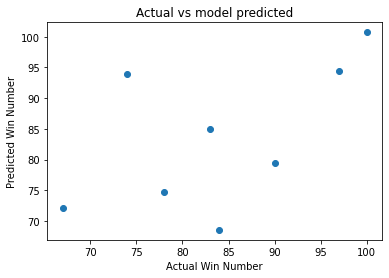

In [49]:
# Lets compare how well our model is able to perform
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Win Number')
plt.ylabel('Predicted Win Number')
plt.title('Actual vs model predicted')
plt.show()

### Adj R2 score is 95%. It can be said to be a good model.